In [124]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [111]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

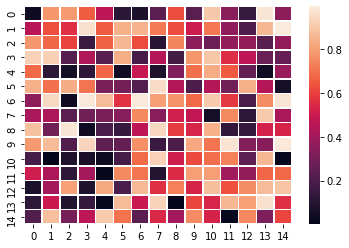

In [112]:
heat=np.random.rand(15, 15)
ax = sns.heatmap(heat, linewidth='0.5')
plt.show()

Text(0.5, 0, '')

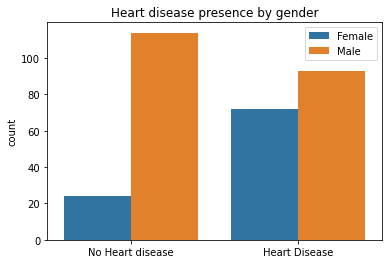

In [113]:
f = sns.countplot(x='target', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Text(0, 0.5, 'Maximum Heart Rate')

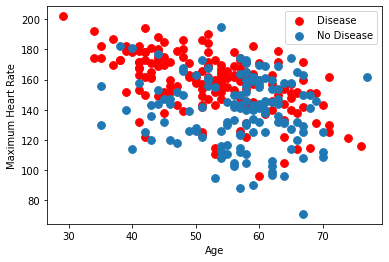

In [114]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red", s=60)
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], s=60)
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

In [117]:
X =df.drop(['target'], axis=1)
Y = df['target']. values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [118]:
# x = df[[ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
#        'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
# y = df[[ 'target' ]]
# y.shape[1]

In [119]:
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",  metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=100, verbose=2)

Epoch 1/100
16/16 - 0s - loss: 26.7798 - accuracy: 0.5496 - val_loss: 11.7765 - val_accuracy: 0.5246
Epoch 2/100
16/16 - 0s - loss: 6.6517 - accuracy: 0.4215 - val_loss: 5.8434 - val_accuracy: 0.3279
Epoch 3/100
16/16 - 0s - loss: 3.9733 - accuracy: 0.3843 - val_loss: 4.1643 - val_accuracy: 0.2623
Epoch 4/100
16/16 - 0s - loss: 2.7323 - accuracy: 0.3802 - val_loss: 2.9011 - val_accuracy: 0.3279
Epoch 5/100
16/16 - 0s - loss: 1.9410 - accuracy: 0.4091 - val_loss: 1.9990 - val_accuracy: 0.2787
Epoch 6/100
16/16 - 0s - loss: 1.4169 - accuracy: 0.4504 - val_loss: 1.4405 - val_accuracy: 0.4098
Epoch 7/100
16/16 - 0s - loss: 1.1004 - accuracy: 0.5124 - val_loss: 1.1808 - val_accuracy: 0.4590
Epoch 8/100
16/16 - 0s - loss: 1.0339 - accuracy: 0.5496 - val_loss: 1.0576 - val_accuracy: 0.5246
Epoch 9/100
16/16 - 0s - loss: 0.9611 - accuracy: 0.5496 - val_loss: 0.9428 - val_accuracy: 0.5902
Epoch 10/100
16/16 - 0s - loss: 0.9108 - accuracy: 0.6033 - val_loss: 0.9184 - val_accuracy: 0.5738
Epoch 1

Epoch 83/100
16/16 - 0s - loss: 0.3952 - accuracy: 0.8264 - val_loss: 0.5272 - val_accuracy: 0.7213
Epoch 84/100
16/16 - 0s - loss: 0.5601 - accuracy: 0.7355 - val_loss: 0.6796 - val_accuracy: 0.6066
Epoch 85/100
16/16 - 0s - loss: 0.5010 - accuracy: 0.7231 - val_loss: 0.3636 - val_accuracy: 0.8689
Epoch 86/100
16/16 - 0s - loss: 0.4160 - accuracy: 0.8058 - val_loss: 0.3475 - val_accuracy: 0.8852
Epoch 87/100
16/16 - 0s - loss: 0.4265 - accuracy: 0.8140 - val_loss: 0.3681 - val_accuracy: 0.8689
Epoch 88/100
16/16 - 0s - loss: 0.3895 - accuracy: 0.8388 - val_loss: 0.4860 - val_accuracy: 0.7541
Epoch 89/100
16/16 - 0s - loss: 0.4372 - accuracy: 0.7975 - val_loss: 0.4874 - val_accuracy: 0.7541
Epoch 90/100
16/16 - 0s - loss: 0.3944 - accuracy: 0.8223 - val_loss: 0.4606 - val_accuracy: 0.7541
Epoch 91/100
16/16 - 0s - loss: 0.5007 - accuracy: 0.7438 - val_loss: 0.9323 - val_accuracy: 0.5574
Epoch 92/100
16/16 - 0s - loss: 0.5447 - accuracy: 0.7645 - val_loss: 0.4539 - val_accuracy: 0.7541


In [122]:
prediction = np.array( [[57, 0, 1, 130, 236, 0, 0, 174, 0, 0.0, 1, 1, 2]], dtype=float)
pred = model.predict(prediction) 
pred = np.argmax(pred)
pred

1

In [125]:
predictions = np.argmax(model.predict(X_test), axis=1)
model_accuracy = accuracy_score(Y_test, predictions)*100
model_accuracy

86.88524590163934